Zadanie 1
Wczytaj ze zbioru danych ML-datasets https://github.com/matzim95/ML-datasets zeszyt ves-usd.csv i pokaż zależność boliwara od dolara amerykańskiego.

Zadanie 2
Skorzystaj z parametrów poznanych na slajdzie 14 i 15 i opisz wykres z poprzedniego zadania.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotnine as pn
import plotly.express as px
import plotly.graph_objects as go
import wordcloud
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("ves-usd.csv")

In [3]:
df.head()

Date         Rate ISO Code From ISO Code To
0     3/1/2019 Friday  3,295.30000           USD         VES
1     3/3/2019 Sunday  3,295.30000           USD         VES
2     3/4/2019 Monday  3,294.90500           USD         VES
3    3/5/2019 Tuesday  3,294.81000           USD         VES
4  3/6/2019 Wednesday  3,294.90500           USD         VES

In [4]:
df["Date"] = pd.to_datetime(df['Date'])
df['Rate'] = df['Rate'].str.replace(',','').astype('float')

C:\Users\Katarzyna\AppData\Local\Temp\ipykernel_11396\3082930400.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


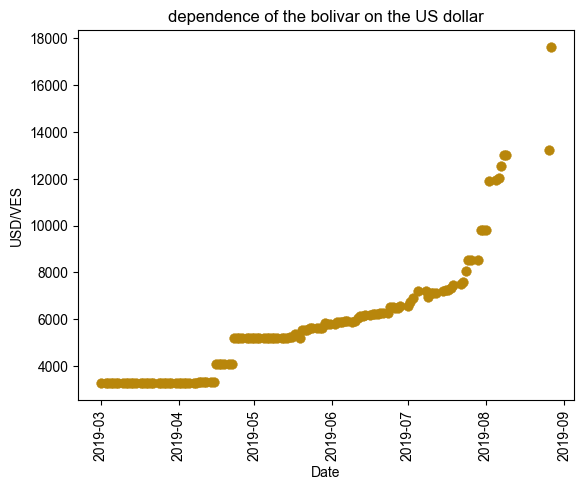

In [5]:
fig, ax = plt.subplots()
plt.style.use("seaborn")

ax.scatter(df['Date'], df['Rate'], c='darkgoldenrod')
ax.xaxis.set_tick_params(rotation = 90)
ax.set_xlabel('Date')
ax.set_ylabel('USD/VES')
ax.set_title('dependence of the bolivar on the US dollar')

plt.show()

Zadanie 3
Dokonaj analizy danych zbioru medali (olympic.csv https://github.com/matzim95/ML-datasets) i wykonaj wykres słupkowy pokazujący ile medali zdobył dany kraj. Za pomocą kolorów oznacz czy medal był złoty, srebrny czy brązowy.

In [6]:
olympic=pd.read_csv('olympic.csv')

In [7]:
olympic.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [8]:
olympic = olympic.dropna(subset=['Medal'])
olympic.head()

ID                      Name Sex   Age  Height  Weight            Team  \
3    4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
37  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
38  15      Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
40  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0         Finland   
41  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   

    NOC        Games  Year  Season       City       Sport  \
3   DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
37  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
38  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
40  FIN  2014 Winter  2014  Winter      Sochi  Ice Hockey   
41  FIN  1948 Summer  1948  Summer     London  Gymnastics   

                                     Event   Medal  
3              Tug-Of-War Men's Tug-Of-War    Gold  
37  Swimming Men's 200 metres Breaststroke  Bronze  
38  Swimming Men's 400 metres Breaststroke  Bronze  
40             Ice Hockey Men's Ice Hockey  Bronze  
41  Gymnastics Men's Individual All-Around  Bronze

In [17]:
olympic.describe()

ID           Age        Height        Weight          Year
count   39783.000000  39051.000000  31072.000000  30456.000000  39783.000000
mean    69407.051806     25.925175    177.554197     73.770680   1973.943845
std     38849.980737      5.914026     10.893723     15.016025     33.822857
min         4.000000     10.000000    136.000000     28.000000   1896.000000
25%     36494.000000     22.000000    170.000000     63.000000   1952.000000
50%     68990.000000     25.000000    178.000000     73.000000   1984.000000
75%    103461.500000     29.000000    185.000000     83.000000   2002.000000
max    135563.000000     73.000000    223.000000    182.000000   2016.000000

In [18]:
olympic[olympic['Age']==73]

ID                                           Name Sex   Age  Height  \
44584  22984  John (Herbert Crawford-) Copley (Williamson-)   M  73.0     NaN   

       Weight           Team  NOC        Games  Year  Season    City  \
44584     NaN  Great Britain  GBR  1948 Summer  1948  Summer  London   

                  Sport                                          Event   Medal  
44584  Art Competitions  Art Competitions Mixed Painting, Graphic Arts  Silver

In [9]:
olympic_agg = olympic.groupby(by=["NOC", 'Medal'], as_index = False).agg(n = ('Medal', "count")).sort_values(by = "n", ascending = False)
olympic_agg.head()

NOC   Medal     n
343  USA    Gold  2638
344  USA  Silver  1641
342  USA  Bronze  1358
337  URS    Gold  1082
124  GER  Bronze   746

In [11]:
winners = olympic_agg.groupby('NOC').sum().sort_values(by='n', ascending=False)
winners = winners[winners['n']>=500]
winners_list = list(winners.index)

In [13]:
new_olympic = olympic_agg[olympic_agg['NOC'].isin(winners_list)]
new_olympic=new_olympic.pivot(index='NOC', columns='Medal', values='n')
new_olympic.sort_index(key=new_olympic.sum(1).get, ascending=False) 
#DataFrame.sum(axis=None, skipna=True, numeric_only=False, min_count=0, **kwargs) -> axis{index (0), columns (1)}

Medal  Bronze  Gold  Silver
NOC                        
USA      1358  2638    1641
URS       689  1082     732
GER       746   745     674
GBR       651   678     739
FRA       666   501     610
ITA       531   575     531
SWE       535   479     522
CAN       451   463     438
AUS       517   348     455
RUS       408   390     367
HUN       371   432     332
NED       413   287     340
NOR       294   378     361
GDR       281   397     327
CHN       292   350     347
JPN       357   247     309
FIN       432   198     270
SUI       268   175     248
ROU       292   161     200
KOR       185   221     232
DEN       177   179     241
FRG       233   159     194
POL       253   117     195

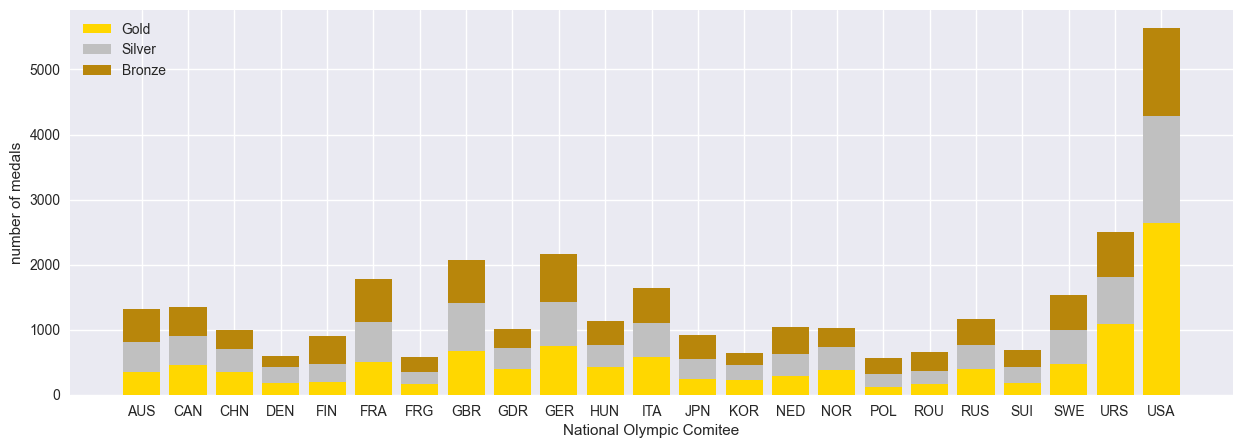

In [22]:
fig, ax = plt.subplots()

fig.set_size_inches([15, 5])

ax.bar(new_olympic.index, new_olympic['Gold'], color = 'gold',label = "Gold")
ax.bar(new_olympic.index, new_olympic['Silver'], bottom = new_olympic['Gold'], color = 'silver', label = "Silver")
ax.bar(new_olympic.index, new_olympic['Bronze'], bottom = new_olympic['Gold']+new_olympic['Silver'], color = 'darkgoldenrod', label = "Bronze")

ax.legend()
ax.set_xlabel('National Olympic Comitee')
ax.set_ylabel('number of medals')

plt.show()

Zadanie 4
Korzystając ze zbioru medali, stwórz wykres punktowy pokazujący zależność wzrostu, wagi i liczby zdobytych przez zawodników medali na igrzyskach.

In [23]:
medal_sum=olympic.groupby(['Name'], as_index=False).agg(n = ('Medal', "count")).sort_values(by = "n", ascending = False)
height_weight = olympic[['Name', 'Height', 'Weight']].copy()
height_weight.dropna(how='any', inplace=True)

display(medal_sum.head())
display(height_weight.head())

Name   n
18078             Michael Fred Phelps, II  28
15306  Larysa Semenivna Latynina (Diriy-)  18
19348        Nikolay Yefimovich Andrianov  15
3212          Borys Anfiyanovych Shakhlin  13
24378                         Takashi Ono  13

Name  Height  Weight
40  Juhamatti Tapio Aaltonen   184.0    85.0
41   Paavo Johannes Aaltonen   175.0    64.0
42   Paavo Johannes Aaltonen   175.0    64.0
44   Paavo Johannes Aaltonen   175.0    64.0
48   Paavo Johannes Aaltonen   175.0    64.0

In [25]:
height_weight.drop_duplicates(inplace=True)

In [28]:
olympic_plot = pd.merge(height_weight,medal_sum, on='Name', how='left' )
olympic_plot

Name  Height  Weight  n
0                 Juhamatti Tapio Aaltonen   184.0    85.0  1
1                  Paavo Johannes Aaltonen   175.0    64.0  5
2                       Kjetil Andr Aamodt   176.0    85.0  8
3                         Pepijn Aardewijn   189.0    72.0  1
4                       Ann Kristin Aarnes   182.0    64.0  1
...                                    ...     ...     ... ..
20775                   Krzysztof Zwoliski   175.0    70.0  1
20776                      Henk Jan Zwolle   197.0    93.0  2
20777  Galina Ivanovna Zybina (-Fyodorova)   168.0    80.0  3
20778                         Bogusaw Zych   182.0    82.0  1
20779            Olesya Nikolayevna Zykina   171.0    64.0  2

[20780 rows x 4 columns]

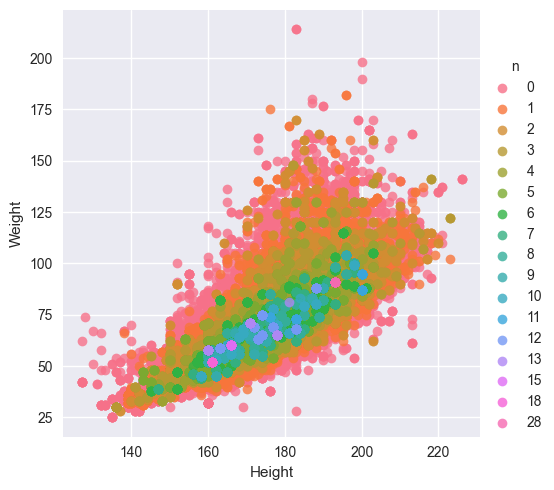

In [114]:
sns.lmplot(data = olympic_plot, x = "Height", y = "Weight", hue = "n", fit_reg = False)

Zadanie 5
Wczytaj zbiór co2 i wyświetl wykres punktowy wartości co2.

In [43]:
co2 = pd.read_csv('co2.csv', parse_dates=True, na_values=-99.99)

In [44]:
co2.head()

Date  Decimal Date  Average  Interpolated   Trend  Number of Days
0  1958-03-01      1958.208   315.71        315.71  314.62              -1
1  1958-04-01      1958.292   317.45        317.45  315.29              -1
2  1958-05-01      1958.375   317.50        317.50  314.71              -1
3  1958-06-01      1958.458      NaN        317.10  314.85              -1
4  1958-07-01      1958.542   315.86        315.86  314.98              -1

In [45]:
co2.describe()

Decimal Date     Average  Interpolated       Trend  Number of Days
count    727.000000  720.000000    727.000000  727.000000      727.000000
mean    1988.458333  353.926431    353.640702  353.633054       18.341128
std       17.500926   27.402435     27.443136   27.369003       12.242015
min     1958.208000  313.200000    312.660000  314.620000       -1.000000
25%     1973.333500  328.877500    328.555000  329.295000       -1.000000
50%     1988.458000  351.575000    351.310000  351.370000       24.000000
75%     2003.583500  375.995000    375.700000  376.135000       28.000000
max     2018.708000  411.240000    411.240000  409.020000       31.000000

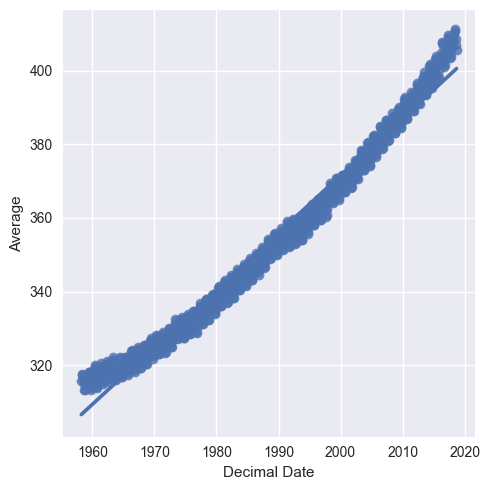

In [46]:
sns.lmplot(data = co2, x = 'Decimal Date', y = 'Average')

Zadanie 6
Wykonaj wykresy boxplot, violinplot oraz swarmplot dla zbioru danych olimpijczyków za pomocą biblioteki seaborn.

In [2]:
olympic = pd.read_csv('olympic.csv', index_col=['ID','Year'])

In [3]:
def groupby(df, col):
    groupby = df.groupby(col)
    return {x: groupby.get_group(x) for x in groupby.groups}

In [4]:
all_sports = groupby(olympic, 'Sport')

<Axes: >

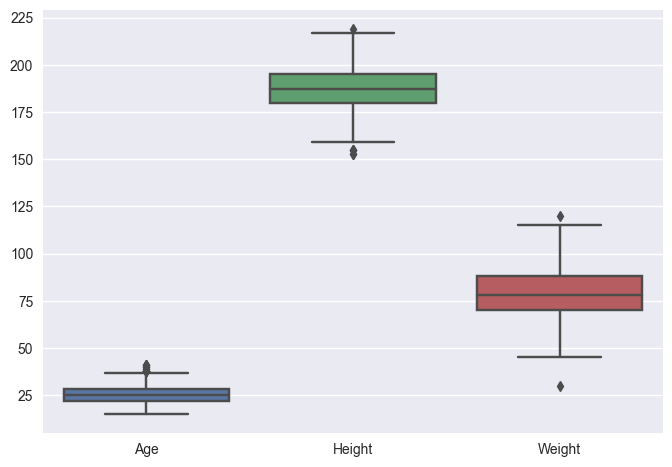

In [67]:
sns.boxplot(data=all_sports['Volleyball'])

<Axes: >

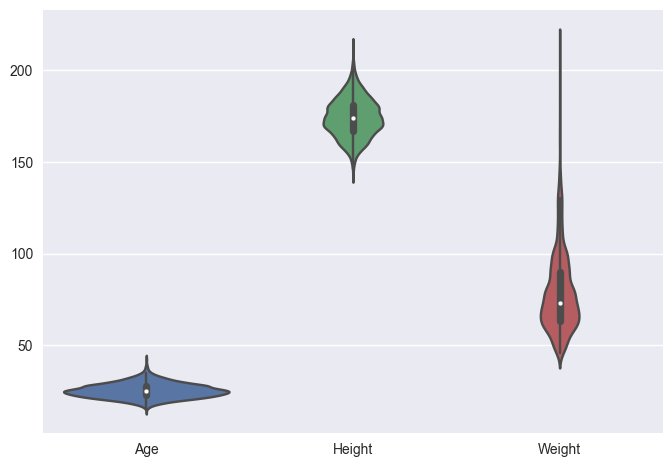

In [70]:
sns.violinplot(data=all_sports['Judo'])

<Axes: >

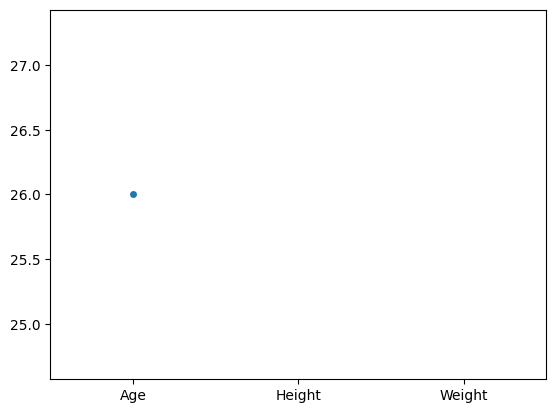

In [5]:
sns.swarmplot(data=all_sports['Aeronautics'])